# 070.Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(X_train.shape)

(320, 2)


In [6]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
y_pred = classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  23.0
accuracy = 0.91


In [8]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 4 54]]

f1 score
 0.8444444444444444


### Visualization of the Training result

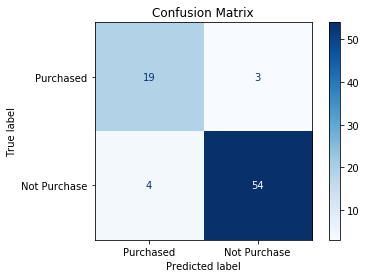

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, labels=[1, 0],
                                          display_labels=['Purchased', 'Not Purchase'],
                                          cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

# Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbclassifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=5)
gbclassifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
y_pred = gbclassifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  21.0
accuracy = 0.94


In [12]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 2 56]]

f1 score
 0.8837209302325582


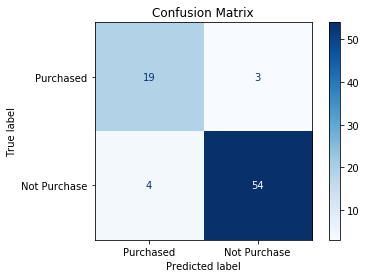

In [13]:
disp = plot_confusion_matrix(classifier, X_test, y_test, labels=[1, 0],
                                          display_labels=['Purchased', 'Not Purchase'],
                                          cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [14]:
gbclassifier.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49461697, 0.50538303])

In [16]:
feature_imp = pd.Series(gbclassifier.feature_importances_, 
                                    ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.505383
Age                0.494617
dtype: float64

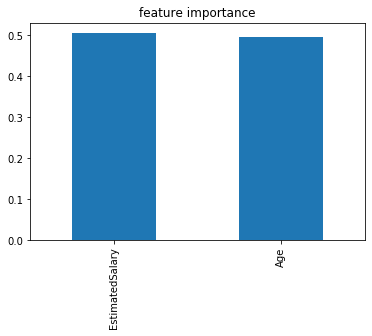

In [17]:
feature_imp.plot(kind='bar', title='feature importance')

# 실습 - Gradient Boosting 을 이용한 Titanic 호의 생존 예측

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
df_titanic = pd.read_csv("datasets/titanic.csv")

In [27]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [29]:
mean_age = df_titanic['Age'].mean()

In [30]:
df_titanic['Age'].fillna(mean_age, inplace=True)

### categorical 변수의 수치화

In [31]:
df_titanic = pd.get_dummies(df_titanic)

In [32]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### feature, label 분리

In [33]:
Y = df_titanic['Survived']
X = df_titanic.drop(['Survived'], axis=1)

In [ ]:
# train / test split

In [ ]:
# Gradient Boosting Classifier

In [ ]:
# your codes below